# TMA4320 Introduksjon til vitenskapelige beregninger



# Liten git guide

## NB husk cell-> All output ->clear

åpne cmd
bruk cd (change directory) for å åpne mappen (>>cd FILPLASSERING)
for å 'pushe' (laste opp endringer du har gjort):
- git add FILNAVN  ( prosjekt3.ipynb)
- git commit -m "her kan du skive en liten commit meliding"
- git pull  
-git push
Ferdig 

for å 'pulle' (laste ned endringer andre har gjort) 
- git pull 
Ferdig 


# 2 Exercises

## 2.1 

Vis at 

$$ 
\begin{align}
  \phi(x,t)=\frac{1}{\sqrt{4 \pi D t}} e^{- (x-\mu)^2 /(4 D t)}
\end{align} 
$$

hvor D er en konstant 

$$
\begin{align}
\frac{\partial \phi (x,t) }{\partial t}= D \frac{\partial^2 \phi (x,t)}{\partial x^2}
\end{align}
$$

Venstre side av ligningen 

$$
\begin{align}
\frac{\partial \phi (x,t)}{\partial t} &=\frac{\partial}{\partial t}\frac{1}{\sqrt{4 \pi D t}} e^{- (x-\mu)^2 /(4 D t))} \\
&=\frac{1}{\sqrt{4 \pi D}}e^{- (x-\mu)^2 /(4 D t))}\big[ \frac{-1/2}{t^{3/2}} + \frac{(x-\mu)^2}{4 D t^2} \big].
\end{align}
$$

og høyre side blir 
$$
\begin{align}
D \frac{\partial^2 \phi (x,t)}{\partial x^2}   \\
&= \frac{\partial}{\partial x} \frac{-2 (x-mu)}{4 D t}  \frac{1}{\sqrt{4 \pi D t}}  e^{- (x-\mu)^2 /(4 D t)} \\
&= D \frac{1}{\sqrt{4 \pi D t}}  e^{- (x-\mu)^2 /(4 D t)} \Big[   
\frac{-2}{4 D t} + \frac{4 (x-\mu)^2}{4^2 D^2 t^2}
\Big]
\end{align}
$$


////////////////////////////////////
HUSK: 
- tilde over phi 
- sjekk om det finnes en bedre måte å skrive e^x på 
- husk å sjekke komma og punktum 



## 2.2
### 2.2.1

La D være en konstant. Start med partikkeldistrubisjonen 
$$
\begin{align}
\phi(x,0)=\delta (x-x_0)
\end{align}
$$

Her kan vi bruke 

$$
\begin{align}
\delta (x-x_0) = \frac{1}{2 \pi} \int_{-\infty}^{\infty} e^{-ik(x-x_0)}dk
\end{align}
$$

Det gir 

$$
\begin{align}
\dot{\phi}(x,t) \big |_{t=0} &= D \phi '' (x,t') \big |_{t'=0} = D \phi ''(x,0) \\
&=D \frac{\partial^2}{\partial x^2} \delta(x-x_0)  \\
&= D \frac{1}{2\pi} \frac{\partial^2}{\partial x^2} \int_{-\infty}^{\infty} e^{-ik(x-x_0)}dk \\
&= D (-ik)^2  \frac{1}{2\pi}  \int_{-\infty}^{\infty} e^{-ik(x-x_0)}dk  \\
&= -Dk^2 \phi (x,0)
\end{align}
$$

Dette gir at for hver gang $\phi$ tidsderiveres detter ut faktor $-Dk^2$. 

Dette kan generaliseres til at 
$$
\begin{align}
\big ( \frac{\partial}{\partial t} \big )^{n} \phi (x,t) \big |_{t=0} = (-Dk^2)^n \phi(x,t)
\end{align}
$$




Dette kan brukes i taylor utviklingen

$$
\begin{align}
\phi (x,t) &= \phi (x,0) + \sum_{n=1}^{\infty} \frac{t^n}{n!} \frac{\partial^n 
\phi(x,t')}{\partial t'^n } 
\Big |_{t'=0}    \\
&=\phi(x,0)+ \sum_{n=1}^{\infty} \frac{ (-Dk^2t)^n}{n!} \\
&= \phi (x,0) e^{-Dk^2t}  \\
&= \frac{1}{2 \pi} \int_{- \infty}^{\infty} e^{-Dk^2t}e^{-ik(x-x_0}
\end{align}
$$



## Husk fiks utregning av integral, skal bli 

$$
\begin{align}
\phi(x,t)= \frac{1}{4\pi D t} e^{- \frac{(x-x_0)^2}{4Dt} }
\end{align}
$$


# Oppgave 3

In [1]:
#Hvordan skal vi normere? må vi gjøre noe med både x-verdiene og y-verdiene?
#Skjedde mye rart da jeg skulle prøve å plotte med normalfordeling i samme plot...
#får ikke til å skalere


import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math




n=1000  #antall partikler
t=100  #antall tidssteg

#returnerer -1 for skritt mot venstre, og 1 for skritt mot høyre
#P er sannsynligheten for skritt mot venstre (for å kunne bruke i alle oppgaver)
def generateRandomStep(P): 
    randomNumber=random.randint(1,10)/10
    if randomNumber<=P:
        return -1
    else:
        return 1

#returnerer 1 partikkels posisjon etter t tilfeldige skritt
def randomParticlePosition(t,P): 
    pos=0
    for i in range(t):
        step=generateRandomStep(P)
        pos+=step
    return pos

#plotter tilfeldige posisjoner for n antall partikler
#Kan bare ende på partall antall steg,så kan evt bare plotte dette (ikke odetall, blir da kurve ikke brått opp og ned graf)
def plotMultipleParticlesPos(n,t):
    xList=np.arange(-t,t,1)
    posList=[0]*t*2      #liste for antall partikler per posisjon
    listOfPositions=[]
    for i in range(n):           #for n partikler
        pos=randomParticlePosition(t,0.5)   #finner posisjon til partikkelen
        listOfPositions.append(pos)
        
    #print(xList,posList)
    #Skalerer listen, fordi total sannsynlighet må jo være 1

    parameters=norm.fit(listOfPositions) #normalfordeling tilpasset dataene
    print(parameters)
    fitted_pdf = norm.pdf(xList,loc = parameters[0],scale = parameters[1])
    plt.plot(xList,fitted_pdf,"red") #normalfordelingskurve
    plt.hist(listOfPositions,density=True,bins=20)  #plotter dataene
    plt.show()
    #print(fitted_pdf)
        
plotMultipleParticlesPos(n,t)

(0.01, 10.035731164195262)


<Figure size 640x480 with 1 Axes>

# Oppgave 5 

In [20]:
import scipy.constants

k=0.5*scipy.constants.eV #hva skal vi sette denne?
T0=273+37
kb=scipy.constants.k
beta=1/(kb*T0) #??
h=1 #skrittlengde
t=100
n=1000

#Definerer potensialene

def V1(x):
    return k*x

def V2(x):
    if x>-3*h or x<3*h:
        return k
    else:
        return 0
    
def V3(x):
    if x<-3*h:
        return -k
    elif x>3*h:
        return k
    else:
        return k*(-1+2*((x+3*h)/6*h))
    
     
    
def plotParticlePositionInPotential(k,beta,h,n,t,V):
    xList=[]
    for x in range(-100,100): #liste for posisjon
        xList.append(x)
    posList=[0]*2*t      #liste for antall partikler per posisjon
    for i in range(n):#for n partikler
        pos=0
        for j in range(t): #t antall skritt
            PdivP=math.exp(-beta*(V(pos-h)-V(pos+h)))
            P=PdivP/(1+PdivP)
            #if j%10==0:
                #print(P)
            step=generateRandomStep(P)
            pos+=step
        #print(pos)
        #print(len(posList))
        #print(pos+100)
        posList[pos+100]+=1 #legger til en til partikkel på posisjonen
    #Skalerer listen, fordi total sannsynlighet må jo være 1
    scaledPosList= [i/sum(posList) for i in posList]
    #print(scaledPosList)
    plt.xlim=(-50,50)
    plt.plot(xList,scaledPosList,"red")  #plotter dataene
    plt.show()

## 5.1

2.3364429142421445e+20


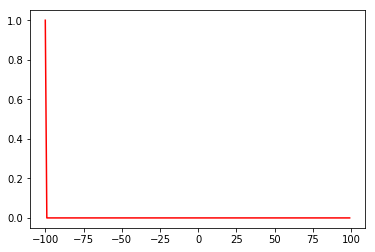

In [21]:
print(beta)

plotParticlePositionInPotential(k,beta,h,n,t,V1)


## 5.2

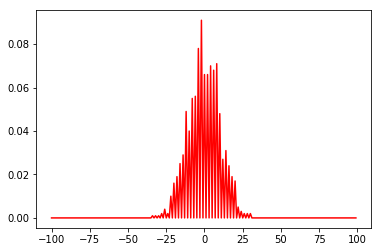

In [22]:

plotParticlePositionInPotential(k,beta,h,n,t,V2)

## 5.3 

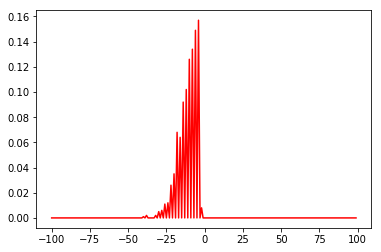

In [23]:
plotParticlePositionInPotential(k,beta,h,n,t,V3)

# Oppgave 7

In [ ]:
h=1
dt=1
L=50
Cc=0.07*scipy.constants.e*10**6

t=1000

V0=1
V0_Na=V0 
V0_K=V0

k=0.5*scipy.constants.eV

x0=L/4
t0=0
NaB0=1450   #skriver B for utenfor cellen, og A for innenfor
KB0=50
NaA0=60
KA0=1400

def V_Na1(x,Vt):
    if x>=-h and x<=h:
        return V0_Na+Vt  #lineær overgang mellom utsiden og innsiden
    elif x<-h:
        return Vt
    else:
        return 0

    
def V_K1(x,Vt):
    if x>=-h and x<=h:
        return V0_K+Vt
    elif x<-h:
        return Vt
    else:
        return 0
    

def randomWalkPotential(V_Na,V_K): #hvilke parametere bør tas inn?
    NaPos=[-x0]*NaB0+[x0]*NaA0  #liste over posisjon til hver Na-partiklene
    #legger til riktig antall utenfor og inni cellen
    KPos=[-x0]*NaB0+[x0]*KA0   #liste over posisjon til hver K-partikkel
    tList=np.arange(0,t,1)   #liste med tidsverdier
    QB=KB0-NaB0  #ladning utenfor
    #ladning inni cellen (ved start):
    QA=KA0+NaA0*scipy.constants.e
    
    Q_plus=abs(QA-QB)
    
    #antall K- og Na- partikler utenfor og innenfor cellen
    KA=KA0
    NaA=NaA0
    KB=KB0   #trengs disse egt? tror de er konstante
    NaB=NaB0
    
    VtList=[]
    
    #plt.hist(NaPos,bins=50)
    #plt.show()
    #plt.hist(KPos,bins=50)
    #plt.show()
    
    for i in range(t):
        #regner ut potensialet V(t)
        Vt=QA/Cc
        VtList.append(Vt)
        
        #Na-partiklene:
        for j in range(len(NaPos)):
                print(Vt)
                PdivP_Na=math.exp(-beta*(V_Na(NaPos[j]-h,Vt)-V_Na(NaPos[j]+h,Vt))) #Hvilket potensial skal her?
                P_Na=PdivP_Na/(1+PdivP_Na)
                step=generateRandomStep(P_Na)
                NaPos[j]+=step
        
        #For K-partiklene
        for k in range(len(KPos)):

                PdivP_K=math.exp(-beta*(V_K(KPos[k]-h,Vt)-V_K(KPos[k]+h,Vt))) 
                P_K=PdivP_K/(1+PdivP_K)
                step=generateRandomStep(P_K)
                KPos[k]+=step

        
        #regner ut antall partikler inni cellen
        #for å finne ut total ladning inni cellen
        for K in KPos:
            if K<-h:
                KA-=1
        #print(NaPos)
        #print(QA)
        for Na in NaPos:
            #print(Na)
            if Na<-h:
                NaA-=1
        
        QA=(KA+NaA)*scipy.constants.e
        #print(QA)
        #print(Q_plus)
        #print(KA,NaA)
        
        #if (t%50==0):
             #plt.hist(NaPos,bins=50)
             #plt.show()
             #plt.hist(KPos,bins=50)
             #plt.show()
        
    plt.hist(NaPos,bins=50)
    plt.show()
    plt.hist(KPos,bins=50)
    plt.show()
    print("ok")
    plt.plot(tList,VtList)
    #print(Vt)

randomWalkPotential(V_Na1,V_K1)
        
        

1.2483018251766514e+17
1.2483018251766514e+17
1.2483018251766514e+17
1.2483018251766514e+17
1.2483018251766514e+17
1.2483018251766514e+17
1.2483018251766514e+17
1.2483018251766514e+17
1.2483018251766514e+17
1.2483018251766514e+17
1.2483018251766514e+17
1.2483018251766514e+17
1.2483018251766514e+17
1.2483018251766514e+17
1.2483018251766514e+17
1.2483018251766514e+17
1.2483018251766514e+17
1.2483018251766514e+17
1.2483018251766514e+17
1.2483018251766514e+17
1.2483018251766514e+17
1.2483018251766514e+17
1.2483018251766514e+17
1.2483018251766514e+17
1.2483018251766514e+17
1.2483018251766514e+17
1.2483018251766514e+17
1.2483018251766514e+17
1.2483018251766514e+17
1.2483018251766514e+17
1.2483018251766514e+17
1.2483018251766514e+17
1.2483018251766514e+17
1.2483018251766514e+17
1.2483018251766514e+17
1.2483018251766514e+17
1.2483018251766514e+17
1.2483018251766514e+17
1.2483018251766514e+17
1.2483018251766514e+17
1.2483018251766514e+17
1.2483018251766514e+17
1.2483018251766514e+17
1.248301825

#oppgave 8